In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib
import ternary

print('Numpy version:', np.__version__)
print('Pandas version:',pd.__version__)

print('Matplotlib version:', matplotlib.__version__)
print("Ternary version:",ternary.__version__)

Numpy version: 1.17.4
Pandas version: 0.25.3
Matplotlib version: 3.1.3
Ternary version: 1.0.6


# DATA
## Enzyme

In [2]:
enzyme_base = pd.read_csv('Enzyme_tradeoff_dis_20201.csv',index_col=0)
enzyme_base.head()

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
Tax1,0.0,1.541601,1.490596,1.462449,1.431839,1.411691,1.401499,1.399105,1.419758,1.448073,...,1.036979,0.997946,0.971312,0.943639,0.909997,0.895300,0.855815,0.840871,0.806879,0.789157
Tax2,0.0,0.233644,0.230462,0.229650,0.228963,0.228387,0.225676,0.225310,0.225084,0.224929,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax3,0.0,2.323268,2.264856,2.220876,2.175904,2.146998,2.150887,2.164466,2.172344,2.208695,...,4.915434,4.761533,4.611020,4.438168,4.293612,4.160518,4.029007,3.882111,3.722760,3.583740
Tax4,0.0,0.182814,0.182570,0.182836,0.184356,0.182430,0.184925,0.187454,0.191432,0.194827,...,3.201010,3.180417,3.162155,3.143226,3.124961,3.105667,3.076340,3.059694,3.042757,3.024577
Tax5,0.0,0.492399,0.489036,0.486234,0.484414,0.483302,0.482955,0.483093,0.484332,0.485803,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


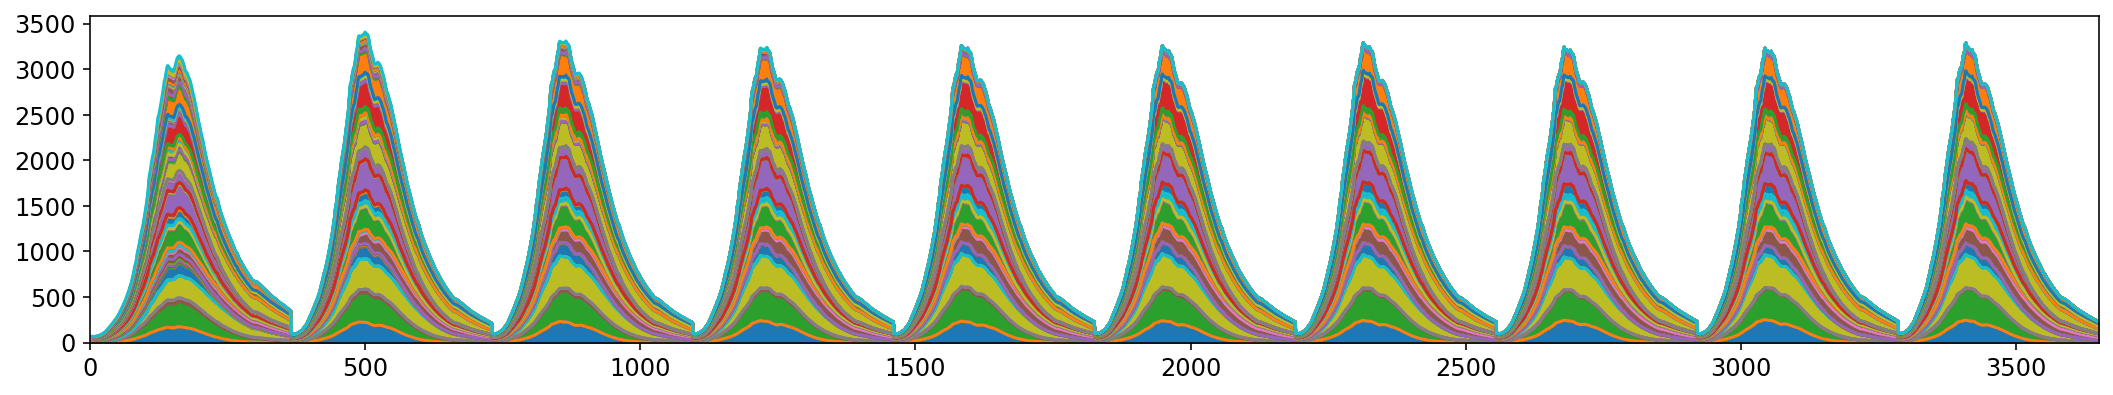

In [3]:
enzyme_base.T.plot.area(fontsize=12,legend=False,figsize=(18,3))

## Osmolyte

In [4]:
osmolyte_base = pd.read_csv('Osmolyte_tradeoff_dis_20201.csv',index_col=0)
osmolyte_base.head()

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
Tax1,0.0,0.000247,0.000386,0.000523,0.000724,0.000887,0.001053,0.001177,0.001401,0.001522,...,0.000375,0.000370,0.000363,0.000347,0.000336,0.000346,0.000305,0.000297,0.000285,0.000279
Tax2,0.0,0.000148,0.000155,0.000165,0.000181,0.000195,0.000209,0.000220,0.000239,0.000249,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax3,0.0,0.000245,0.000579,0.000863,0.001286,0.001599,0.001914,0.002121,0.002510,0.002669,...,0.001457,0.001454,0.001415,0.001340,0.001317,0.001332,0.001164,0.001115,0.001070,0.001042
Tax4,0.0,0.000192,0.000288,0.000394,0.000562,0.000704,0.000861,0.000982,0.001177,0.001284,...,0.007567,0.007714,0.007682,0.007528,0.007569,0.007787,0.007080,0.006978,0.006933,0.006951
Tax5,0.0,0.000370,0.000427,0.000493,0.000603,0.000702,0.000805,0.000883,0.001011,0.001077,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


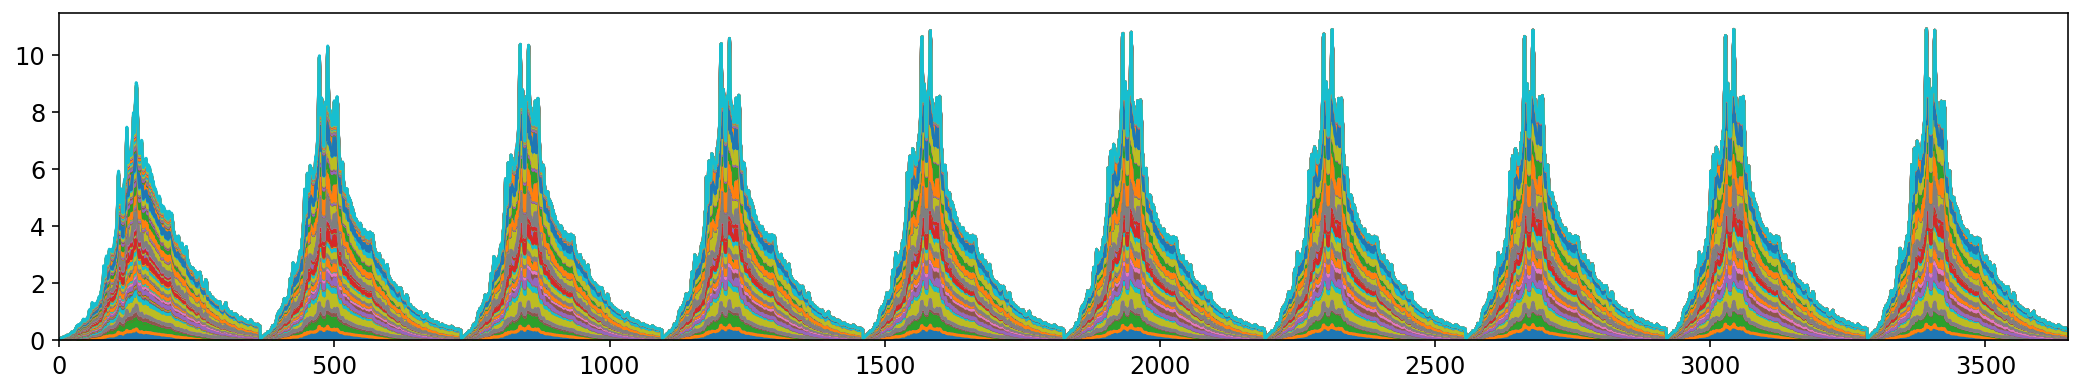

In [5]:
osmolyte_base.T.plot.area(fontsize=12,legend=False,figsize=(18,3))

## yield

In [6]:
yield_base = pd.read_csv('Yield_tradeoff_dis_20201.csv',index_col=0)
yield_base.head()

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
Tax1,0.0,-2.997457,-2.342049,-1.748957,-0.901327,-0.227131,0.431635,0.909272,1.712073,2.100585,...,-1.236645,-1.161144,-1.120723,-1.112069,-1.068396,-0.995075,-1.046251,-1.033037,-0.976270,-0.953619
Tax2,0.0,-0.422814,-0.388092,-0.353625,-0.300141,-0.251445,-0.198635,-0.160153,-0.099786,-0.068112,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax3,0.0,-3.394895,-2.610202,-1.947786,-0.997847,-0.300472,0.343782,0.750583,1.540250,1.809157,...,-5.283594,-5.039868,-4.872886,-4.737221,-4.542356,-4.295774,-4.412347,-4.248704,-4.044498,-3.868437
Tax4,0.0,-0.848852,-0.664499,-0.462017,-0.151413,0.134274,0.417646,0.633402,0.978774,1.162224,...,-6.971894,-6.593403,-6.558965,-6.737744,-6.544635,-6.037426,-7.161216,-7.160366,-6.980372,-6.824243
Tax5,0.0,-0.949917,-0.841981,-0.718257,-0.522667,-0.346992,-0.168490,-0.033449,0.184326,0.292620,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### get rid of negative vals

In [7]:
yield_base[yield_base < 0] = 0
yield_base.head()

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
Tax1,0.0,0.0,0.0,0.0,0.0,0.000000,0.431635,0.909272,1.712073,2.100585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax3,0.0,0.0,0.0,0.0,0.0,0.000000,0.343782,0.750583,1.540250,1.809157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax4,0.0,0.0,0.0,0.0,0.0,0.134274,0.417646,0.633402,0.978774,1.162224,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax5,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.184326,0.292620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


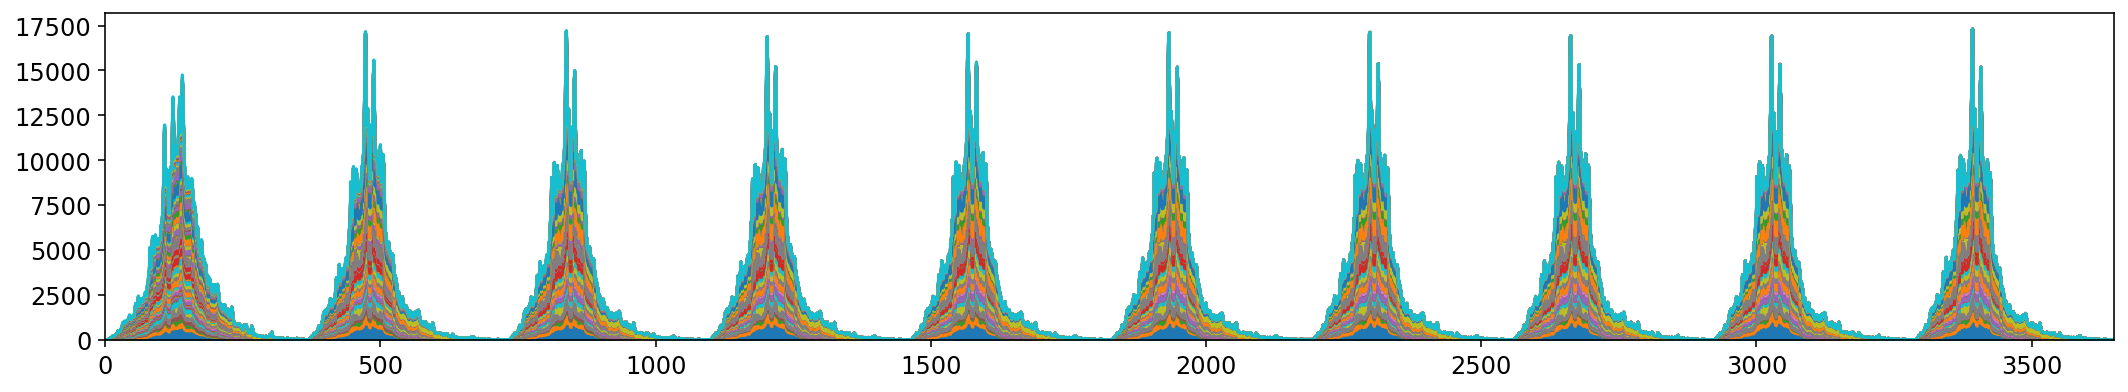

In [8]:
yield_base.T.plot.area(fontsize=12,legend=False,figsize=(18,3))

## tradeoffx10

In [9]:
enzyme_basex10 = pd.read_csv('Enzyme_tradeoffx10_dis_20201.csv',index_col=0)
enzyme_basex10.head()

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
Tax1,0.0,1.541601,1.490596,1.462449,1.431839,1.411691,1.401499,1.399105,1.419758,1.448073,...,0.991009,0.965965,0.950289,0.934658,0.919279,0.904622,0.889487,0.859533,0.824038,0.809996
Tax2,0.0,0.233644,0.230462,0.229650,0.228963,0.228387,0.225676,0.225310,0.225084,0.224929,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax3,0.0,2.323268,2.264856,2.220876,2.175904,2.146998,2.150887,2.164466,2.172344,2.208695,...,5.776814,5.619437,5.448015,5.279852,5.136324,4.975971,4.815361,4.662928,4.506370,4.349090
Tax4,0.0,0.182814,0.182570,0.182836,0.184356,0.182430,0.184925,0.187454,0.191432,0.194827,...,1.952006,1.945648,1.935082,1.926467,1.919728,1.910070,1.894625,1.884617,1.874293,1.863012
Tax5,0.0,0.492399,0.489036,0.486234,0.484414,0.483302,0.482955,0.483093,0.484332,0.485803,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


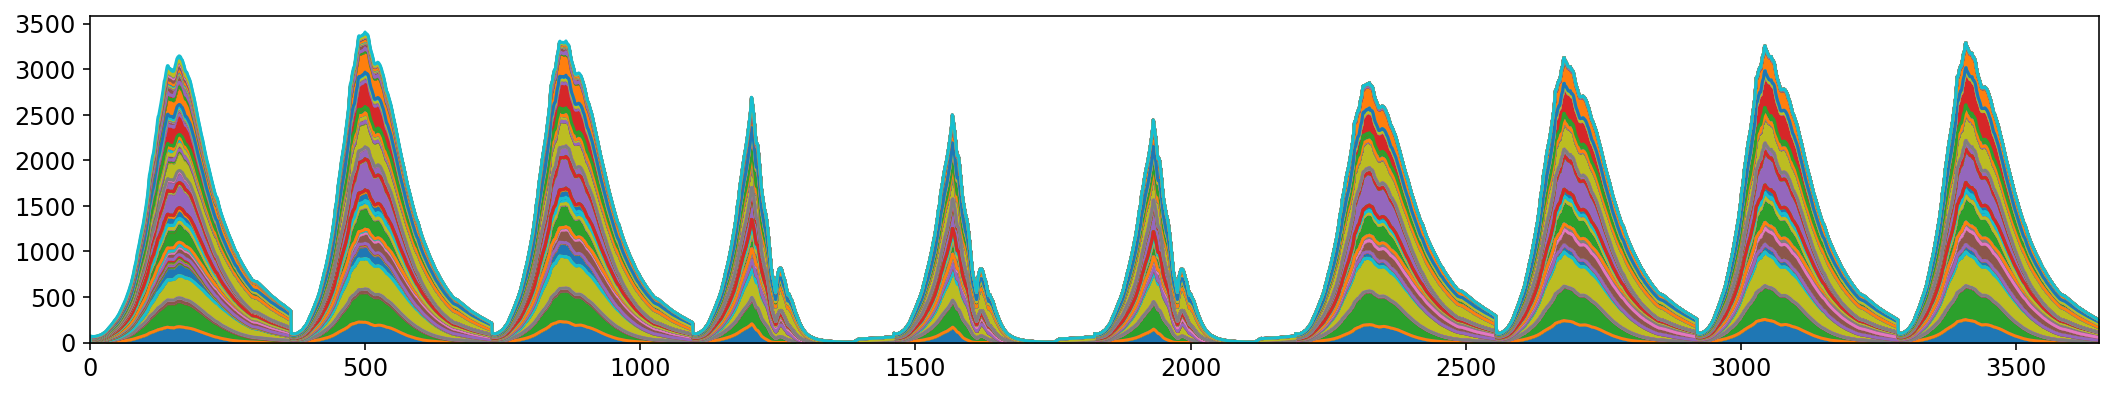

In [10]:
enzyme_basex10.T.plot.area(fontsize=12,legend=False,figsize=(18,3))

In [11]:
osmolyte_basex10 = pd.read_csv('Osmolyte_tradeoffx10_dis_20201.csv',index_col=0)
osmolyte_basex10.head()

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
Tax1,0.0,0.000247,0.000386,0.000523,0.000724,0.000887,0.001053,0.001177,0.001401,0.001522,...,0.000362,0.000365,0.000359,0.000348,0.000345,0.000352,0.000319,0.000306,0.000293,0.000290
Tax2,0.0,0.000148,0.000155,0.000165,0.000181,0.000195,0.000209,0.000220,0.000239,0.000249,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax3,0.0,0.000245,0.000579,0.000863,0.001286,0.001599,0.001914,0.002121,0.002510,0.002669,...,0.001749,0.001750,0.001707,0.001630,0.001607,0.001619,0.001423,0.001365,0.001319,0.001289
Tax4,0.0,0.000192,0.000288,0.000394,0.000562,0.000704,0.000861,0.000982,0.001177,0.001284,...,0.004736,0.004838,0.004830,0.004731,0.004782,0.004929,0.004485,0.004431,0.004402,0.004413
Tax5,0.0,0.000370,0.000427,0.000493,0.000603,0.000702,0.000805,0.000883,0.001011,0.001077,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


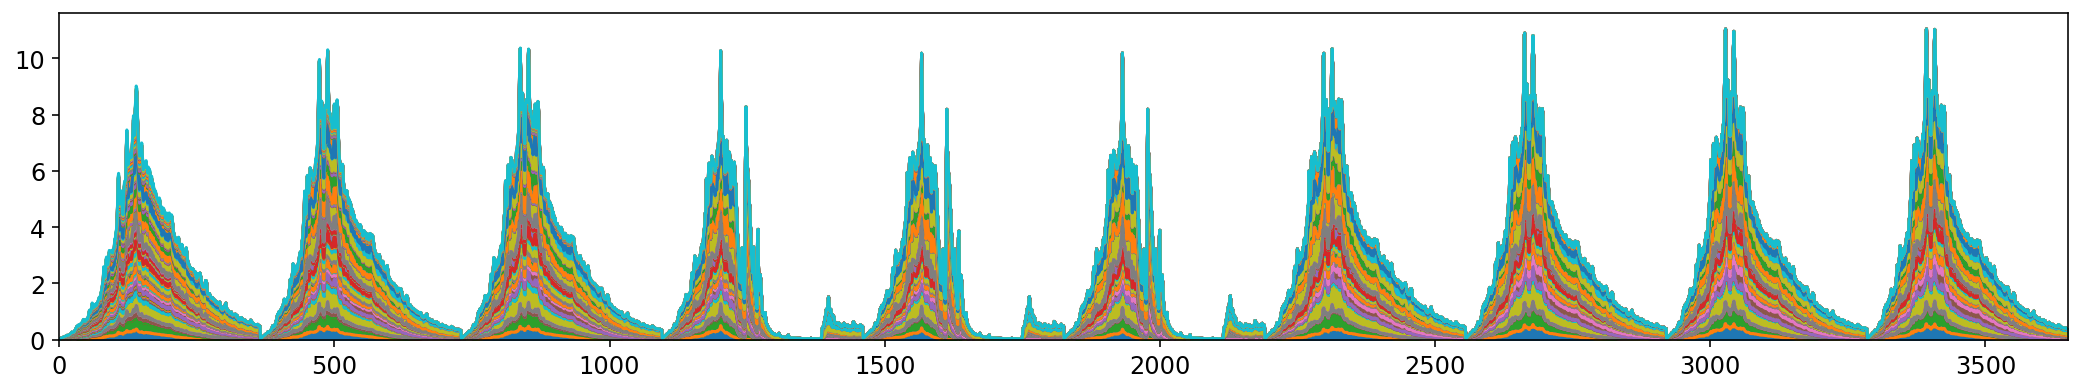

In [12]:
osmolyte_basex10.T.plot.area(fontsize=12,legend=False,figsize=(18,3))

In [13]:
yield_basex10 = pd.read_csv('Yield_tradeoffx10_dis_20201.csv',index_col=0)
yield_basex10.head()

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
Tax1,0.0,-2.997457,-2.342049,-1.748957,-0.901327,-0.227131,0.431635,0.909272,1.712073,2.100585,...,-1.169850,-1.098335,-1.083225,-1.086400,-1.057995,-0.996345,-1.079893,-1.045957,-0.989883,-0.967137
Tax2,0.0,-0.422814,-0.388092,-0.353625,-0.300141,-0.251445,-0.198635,-0.160153,-0.099786,-0.068112,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax3,0.0,-3.394895,-2.610202,-1.947786,-0.997847,-0.300472,0.343782,0.750583,1.540250,1.809157,...,-6.135233,-5.879084,-5.685805,-5.564604,-5.371034,-5.084678,-5.210232,-5.051650,-4.845303,-4.642688
Tax4,0.0,-0.848852,-0.664499,-0.462017,-0.151413,0.134274,0.417646,0.633402,0.978774,1.162224,...,-4.023456,-3.811404,-3.773589,-3.912067,-3.776698,-3.454557,-4.179192,-4.161044,-4.049374,-3.951703
Tax5,0.0,-0.949917,-0.841981,-0.718257,-0.522667,-0.346992,-0.168490,-0.033449,0.184326,0.292620,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [14]:
yield_basex10[yield_basex10 < 0] = 0
yield_basex10.head()

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
Tax1,0.0,0.0,0.0,0.0,0.0,0.000000,0.431635,0.909272,1.712073,2.100585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax3,0.0,0.0,0.0,0.0,0.0,0.000000,0.343782,0.750583,1.540250,1.809157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax4,0.0,0.0,0.0,0.0,0.0,0.134274,0.417646,0.633402,0.978774,1.162224,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax5,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.184326,0.292620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


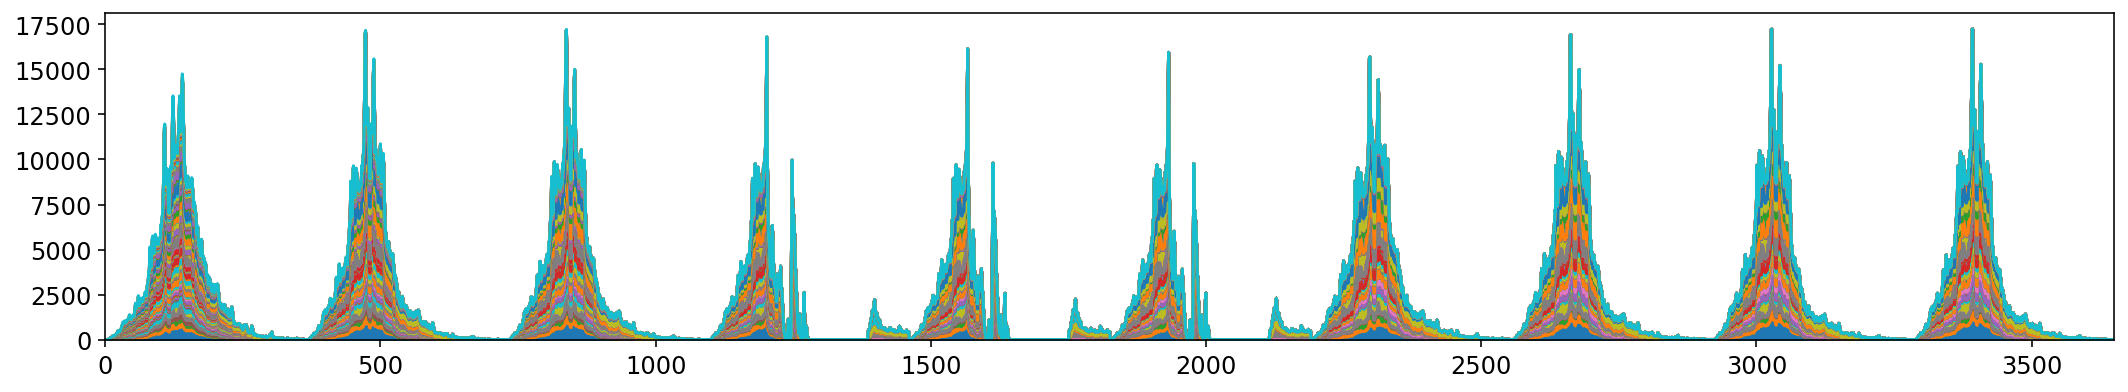

In [15]:
yield_basex10.T.plot.area(fontsize=12,legend=False,figsize=(18,3))

## define function of deriving data of a specific day

In [16]:
def day_data(day):
    
    day = pd.concat([enzyme_base.loc[:,str(day)], osmolyte_base.loc[:,str(day)],yield_base.loc[:,str(day)]],axis=1,sort=False)
    day.columns = ['Enzyme','Osmolyte', 'Yield']
    total = day.sum(axis=1)
    day_alive = 100*day[total>0].divide(total[total>0],axis=0)
    
    return day_alive

In [17]:
day_2_alive = day_data(2)
day_2_alive

,Enzyme,Osmolyte,Yield
Tax1,99.974110,0.025890,0.0
Tax2,99.932920,0.067080,0.0
Tax3,99.974428,0.025572,0.0
Tax4,99.842692,0.157308,0.0
Tax5,99.912807,0.087193,0.0
...,...,...,...
Tax96,99.971046,0.028954,0.0
Tax97,99.982970,0.017030,0.0
Tax98,99.975404,0.024596,0.0
Tax99,99.932325,0.067675,0.0


In [18]:
day_5_alive = day_data(5)
day_5_alive

,Enzyme,Osmolyte,Yield
Tax1,99.937192,0.062808,0.000000
Tax2,99.914548,0.085452,0.000000
Tax3,99.925582,0.074418,0.000000
Tax4,57.474749,0.221832,42.303419
Tax5,99.854929,0.145071,0.000000
...,...,...,...
Tax96,99.960441,0.039559,0.000000
Tax97,99.974361,0.025639,0.000000
Tax98,99.949604,0.050396,0.000000
Tax99,99.913973,0.086027,0.000000


## base

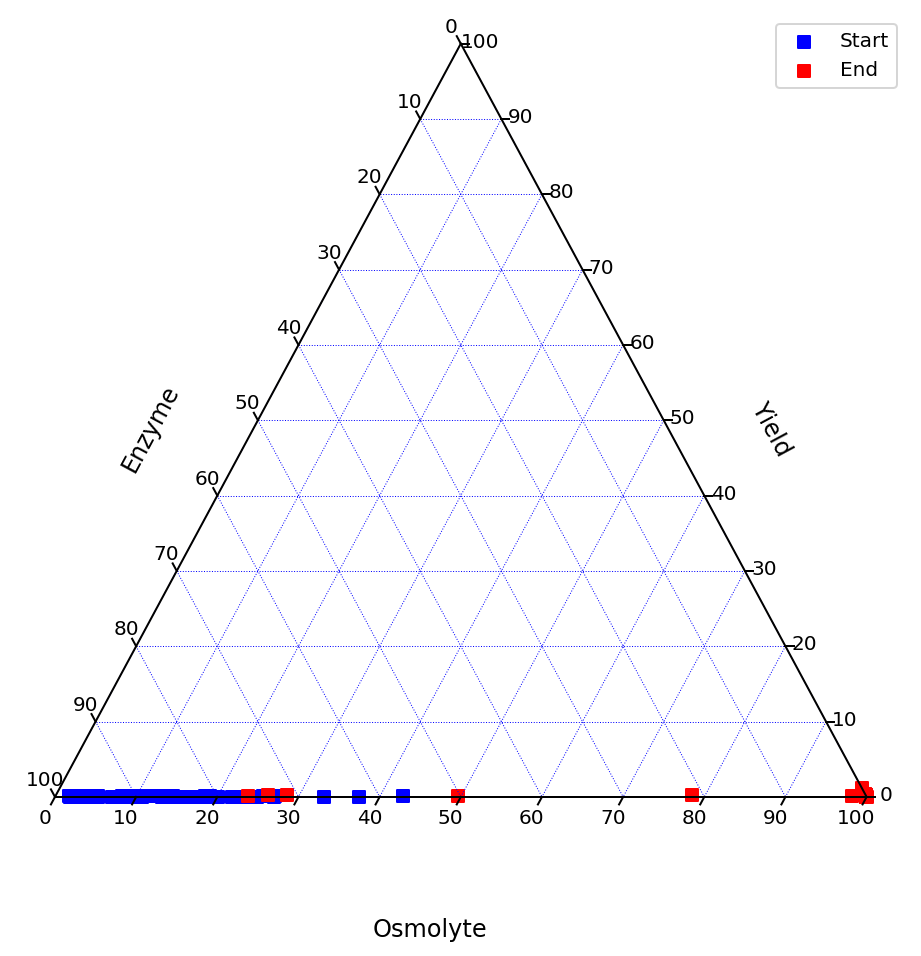

In [34]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(8,8)

#tax.scatter(day_2_alive.values, marker='.', color='red', label="Red Squares")
#tax.scatter(day_5_alive.values, marker='.', color='red',label="Red Squares")
#tax.scatter(day_data(100).values, marker='.', color='orange',label="Red Squares")
#tax.scatter(day_data(150).values, marker='.', color='green',label="Red Squares")
#tax.scatter(day_data(200).values, marker='.', color='black',label="Red Squares")
tax.scatter(day_data(365*3-257).values, marker='s', color='blue',label="Start") # start of dry season

#tax.scatter(day_data(365*3-97).values,  marker='s', color='orange', label="Later")   # drought peak

tax.scatter(day_data(365*3-75).values,  marker='s', color='red', label="End")   # end of dry season


tax.legend()

#tax.set_title("Scatter Plot", fontsize=20)
fontsize =12
tax.left_axis_label("Enzyme", fontsize=fontsize, offset=0.14)
tax.right_axis_label("Yield", fontsize=fontsize, offset=0.14)
tax.bottom_axis_label("Osmolyte", fontsize=fontsize, offset=0.14)

tax.gridlines(multiple=scale/10, color="blue", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

#tax.savefig('scatter_ternary.pdf')
tax.show()

## define function of tradeoffx10

In [20]:
def day_datax10(day):
    
    day = pd.concat([enzyme_basex10.loc[:,str(day)], osmolyte_basex10.loc[:,str(day)],yield_basex10.loc[:,str(day)]],axis=1,sort=False)
    day.columns = ['Enzyme','Osmolyte', 'Yield']
    total = day.sum(axis=1)
    day_alive = 100*day[total>0].divide(total[total>0],axis=0)
    
    return day_alive

## base vs basex10

In [21]:
day_data(365*6-75)

,Enzyme,Osmolyte,Yield
Tax1,99.942687,0.057313,0.000000
Tax3,99.947770,0.052230,0.000000
Tax4,99.614908,0.385092,0.000000
Tax5,99.851254,0.148746,0.000000
Tax7,99.892896,0.107104,0.000000
Tax9,99.903086,0.096914,0.000000
Tax11,99.936432,0.063568,0.000000
Tax23,99.795274,0.204726,0.000000
Tax24,99.913814,0.086186,0.000000
Tax26,99.868289,0.131711,0.000000


In [22]:
day_datax10(365*6-75)

,Enzyme,Osmolyte,Yield
Tax28,99.778854,0.221146,0.0
Tax59,99.875953,0.124047,0.0
Tax73,99.611184,0.388816,0.0
Tax80,99.254723,0.745277,0.0


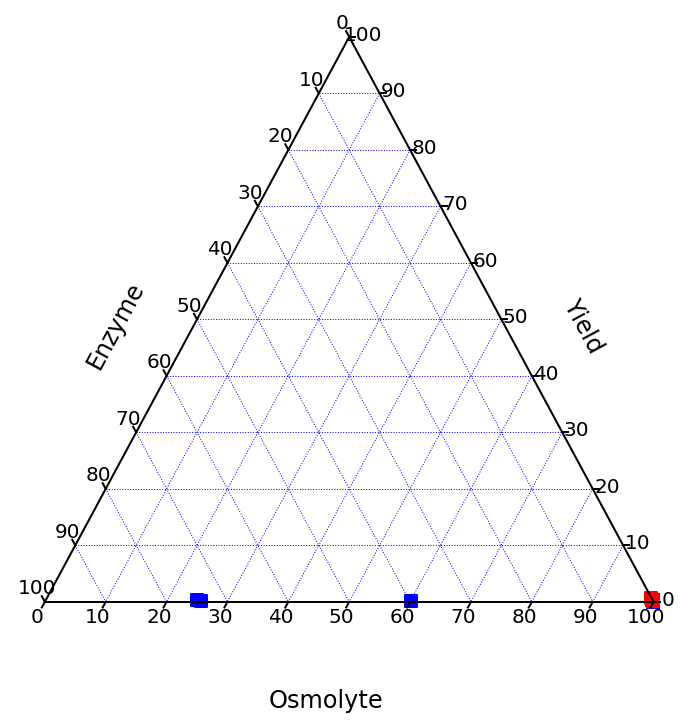

In [24]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(6,6)

#tax.scatter(day_data(365*6-200).values,    marker='o', color='blue',label="Red Squares")
#tax.scatter(day_datax10(365*6-200).values, marker='s', color='red', label="Red Squares")

tax.scatter(day_data(365*6-75).values,  marker='s', color='blue', label="Base")
#tax.scatter(day_datax4(365*6-75).values, marker='s', color='green',label="Basex4")
tax.scatter(day_datax10(365*6-75).values, marker='s', color='red',label="Basex10")
#tax.legend()

#tax.set_title("Scatter Plot", fontsize=20)
fontsize =12
tax.left_axis_label("Enzyme", fontsize=fontsize, offset=0.14)
tax.right_axis_label("Yield", fontsize=fontsize, offset=0.14)
tax.bottom_axis_label("Osmolyte", fontsize=fontsize, offset=0.14)

tax.gridlines(multiple=scale/10, color="blue", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

#tax.savefig('scatter_ternary.pdf')
tax.show()

# community-level

In [25]:
community_base = pd.concat([enzyme_base.sum(axis=0),osmolyte_base.sum(axis=0),yield_base.sum(axis=0)],axis=1,sort=False)
community_base.columns = ['Enzyme','Osmolyte', 'Yield']
total = community_base.sum(axis=1)
community_base_alive = 100*community_base[total>0].divide(total[total>0],axis=0)
community_base_alive

,Enzyme,Osmolyte,Yield
1,99.954277,0.045723,0.000000
2,99.943268,0.056732,0.000000
3,99.932334,0.067666,0.000000
4,99.915706,0.084294,0.000000
5,95.417353,0.093686,4.488961
...,...,...,...
3646,99.829167,0.170833,0.000000
3647,99.841301,0.158699,0.000000
3648,99.841571,0.158429,0.000000
3649,99.840620,0.159380,0.000000


In [26]:
community_basex10 = pd.concat([enzyme_basex10.sum(axis=0),osmolyte_basex10.sum(axis=0),yield_basex10.sum(axis=0)],axis=1,sort=False)
community_basex10.columns = ['Enzyme','Osmolyte', 'Yield']
total = community_basex10.sum(axis=1)
community_basex10_alive = 100*community_basex10[total>0].divide(total[total>0],axis=0)
community_basex10_alive

,Enzyme,Osmolyte,Yield
1,99.954277,0.045723,0.000000
2,99.943268,0.056732,0.000000
3,99.932334,0.067666,0.000000
4,99.915706,0.084294,0.000000
5,95.417353,0.093686,4.488961
...,...,...,...
3646,99.417348,0.159580,0.423072
3647,99.851596,0.148404,0.000000
3648,99.851912,0.148088,0.000000
3649,99.851108,0.148892,0.000000


### year-6

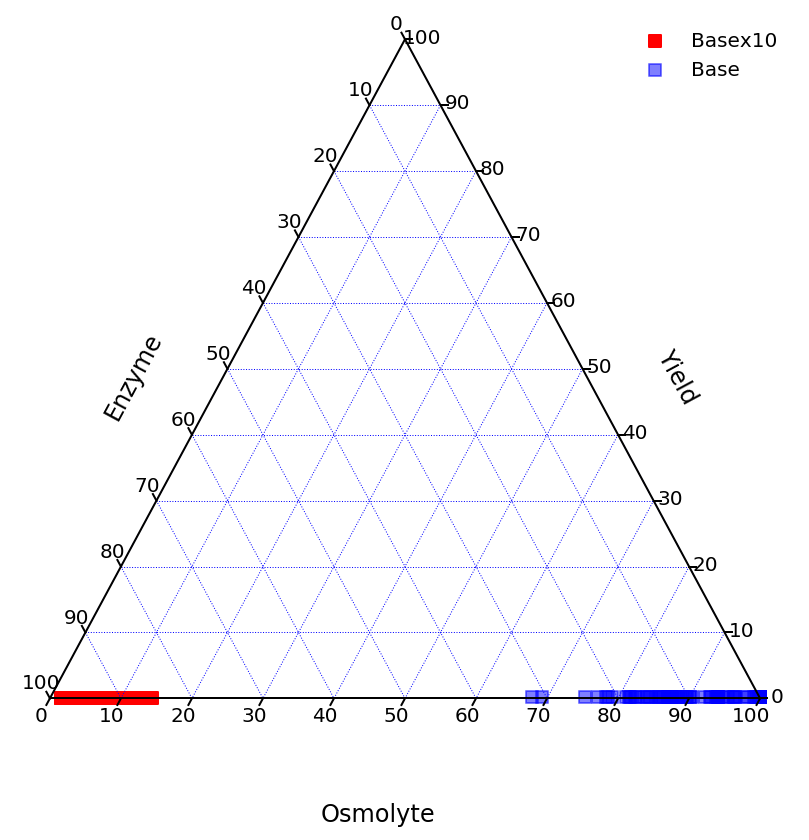

In [38]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(7,7)

tax.scatter(community_basex10_alive.iloc[365*6-75:365*6-0,:].values, marker='s', color='red',label="Basex10")
tax.scatter(community_base_alive.iloc[365*6-75:365*6-0,:].values, marker='s', color='blue', label="Base",alpha=0.5)

tax.legend(frameon=False)

#tax.set_title("Scatter Plot", fontsize=20)
fontsize =12
tax.left_axis_label("Enzyme", fontsize=fontsize, offset=0.14)
tax.right_axis_label("Yield", fontsize=fontsize, offset=0.14)
tax.bottom_axis_label("Osmolyte", fontsize=fontsize, offset=0.14)

tax.gridlines(multiple=scale/10, color="blue", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

#tax.savefig('scatter_ternary.pdf')
tax.show()

### year-9

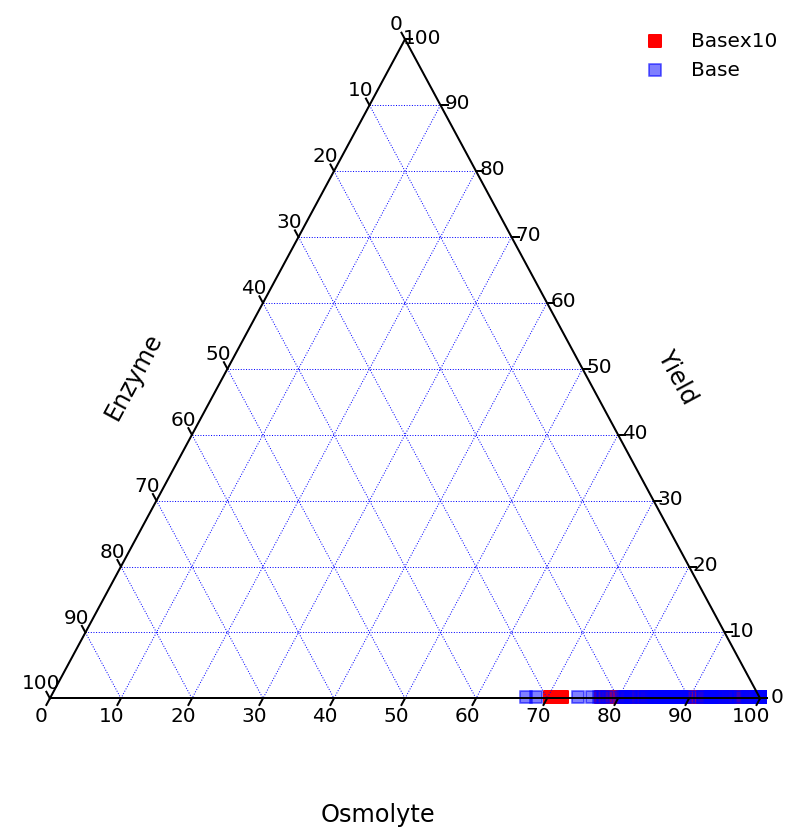

In [36]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(7,7)

tax.scatter(community_basex10_alive.iloc[365*9-75:365*9-0,:].values, marker='s', color='red',label="Basex10")
tax.scatter(community_base_alive.iloc[365*9-75:365*9-0,:].values, marker='s', color='blue', label="Base",alpha=0.5)

tax.legend(frameon=False)

#tax.set_title("Scatter Plot", fontsize=20)
fontsize =12
tax.left_axis_label("Enzyme", fontsize=fontsize, offset=0.14)
tax.right_axis_label("Yield", fontsize=fontsize, offset=0.14)
tax.bottom_axis_label("Osmolyte", fontsize=fontsize, offset=0.14)

tax.gridlines(multiple=scale/10, color="blue", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

#tax.savefig('scatter_ternary.pdf')
tax.show()